In [1]:
%matplotlib inline
import math,sys,os,numpy as np
from numpy.random import random
from matplotlib import pyplot as plt, rcParams, animation, rc
from __future__ import print_function, division
from ipywidgets import interact, interactive, fixed
from ipywidgets.widgets import *
rc('animation', html='html5')
rcParams['figure.figsize'] = 3, 3
plt.rcParams['animation.ffmpeg_path'] = '/opt/local/bin/ffmpeg'
%precision 4
np.set_printoptions(precision=4, linewidth=100)

In [12]:
def lin(a,b,x):
    return a*x+b

a=3.
b=8.

In [13]:
n=30
x=random(n)
y=lin(a,b,x)

In [14]:
x

array([ 0.0573,  0.6975,  0.5141,  0.4874,  0.1477,  0.9068,  0.2343,  0.2676,  0.7633,  0.0761,
        0.3166,  0.5212,  0.268 ,  0.9758,  0.5188,  0.1884,  0.4618,  0.3574,  0.8565,  0.1502,
        0.0469,  0.6311,  0.1004,  0.2109,  0.7203,  0.3839,  0.1669,  0.4288,  0.4159,  0.3327])

In [15]:
y

array([  8.172 ,  10.0925,   9.5422,   9.4621,   8.4432,  10.7205,   8.7028,   8.8027,  10.2899,
         8.2283,   8.9498,   9.5635,   8.804 ,  10.9274,   9.5565,   8.5652,   9.3854,   9.0723,
        10.5696,   8.4506,   8.1406,   9.8933,   8.3013,   8.6327,  10.1608,   9.1518,   8.5008,
         9.2863,   9.2477,   8.998 ])

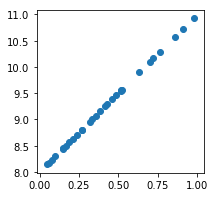

In [16]:
plt.scatter(x,y)

In [17]:
 def sum_square_e(y, y_pred):
    return ((y-y_pred)**2).sum()
    
def loss(y,a,b,x):
    return sum_square_e(y, lin(a,b,x))

def avg_loss(y,a,b,x):
    return np.sqrt(loss(y,a,b,x)/n)


In [111]:
a_guess=-1.
b_guess=1.
global a_guess,b_guess

In [96]:
avg_loss(y,a_guess,b_guess,x)

8.6889

In [114]:
lr=0.01

#d[(y-(a*x+b))**2,b]
#d[(y-(a*x+b))**2,a]

def update():
    global a_guess,b_guess
    y_pred=lin(a_guess,b_guess,x)
    dydb=2 * (y - y_pred)
    print(dydb)
    dyda=x * dydb
    a_guess += lr * dyda.mean()
    b_guess += lr * dydb.mean()
    return a_guess, b_guess
    

In [115]:
for i in range(10):
    a_guess,b_guess = update()

a_guess,b_guess

[ 14.4586  19.5801  18.1126  17.8988  15.1818  21.2547  15.8741  16.1405  20.1064  14.6087  16.5328
  18.1694  16.1439  21.8064  18.1506  15.5071  17.6945  16.8596  20.8522  15.2015  14.375   19.0488
  14.8034  15.6873  19.7621  17.0715  15.3355  17.4301  17.3272  16.6615]
[ 14.1049  19.1296  17.6899  17.4801  14.8144  20.7726  15.4936  15.755   19.646   14.2522  16.1399
  17.7456  15.7583  21.3139  17.7271  15.1336  17.2797  16.4605  20.3777  14.8338  14.0228  18.6084
  14.4431  15.3103  19.3082  16.6685  14.9652  17.0203  16.9193  16.2661]
[ 13.7595  18.6898  17.2771  17.0713  14.4556  20.3019  15.1221  15.3786  19.1965  13.904   15.7562
  17.3317  15.3818  20.833   17.3136  14.7688  16.8746  16.0708  19.9144  14.4746  13.6789  18.1783
  14.0914  14.9423  18.8649  16.2748  14.6036  16.62    16.5209  15.8801]
[ 13.4222  18.2602  16.874   16.672   14.1053  19.8421  14.7593  15.011   18.7574  13.564   15.3816
  16.9276  15.0142  20.3633  16.9098  14.4126  16.479   15.6902  19.4619  14.1

(-0.3189, 2.5535)

In [116]:
fig = plt.figure(dpi=100, figsize=(5,4))
plt.scatter(x,y)

line, = plt.plot(x, lin(a_guess,b_guess,x))
plt.close()

def animate(i):
    global a_guess,b_guess
    line.set_ydata(lin(a_guess,b_guess,x))
    for i in range(10):
        a_guess,b_guess = update()
    return line,

ani = animation.FuncAnimation(fig, animate, np.arange(0,40), interval=100)
ani

[ 11.2735  15.5229  14.3053  14.1279  11.8735  16.9124  12.4479  12.669   15.9597  11.398   12.9945
  14.3524  12.6718  17.3702  14.3368  12.1435  13.9584  13.2656  16.5784  11.8899  11.2041  15.0821
  11.5596  12.293   15.6739  13.4415  12.0011  13.739   13.6536  13.1013]
[ 10.9948  15.1678  13.9721  13.7979  11.584   16.5322  12.1481  12.3652  15.5966  11.1171  12.6848
  14.0183  12.3679  16.9818  14.003   11.8491  13.6314  12.9511  16.2042  11.6001  10.9266  14.7348
  11.2757  11.9959  15.316   13.1238  11.7093  13.416   13.3321  12.7896]
[ 10.7226  14.8209  13.6466  13.4755  11.3013  16.1609  11.8553  12.0685  15.2421  10.8428  12.3824
  13.692   12.0712  16.6024  13.677   11.5616  13.312   12.6439  15.8388  11.3171  10.6557  14.3957
  10.9985  11.7058  14.9665  12.8135  11.4243  13.1005  13.0181  12.4854]
[ 10.4569  14.4822  13.3288  13.1608  11.0253  15.7984  11.5694  11.7788  14.8959  10.5749  12.0871
  13.3734  11.7815  16.232   13.3587  11.281   13.0002  12.3439  15.482   11.0

In [21]:
a_guess

-43553.4688